winemag-data.csv 파일을 reviews 로 읽는다.

In [5]:
import pandas as pd
df = pd.read_csv('../data/winemag-data.csv', index_col= 0)
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


리뷰 데이터프레임에서 points 컬럼의  median 값은?

In [6]:
df['points'].median()

88.0

나라를 중복되지 않도록 가져와서 countries 변수에 저장하고, 화면에 출력하시오.

In [37]:
df['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [38]:
df['country'].nunique()

43

각 국가별로는 몇개의 리뷰가 있는지, 각국가별 리뷰수를 구하시오.

In [52]:
import matplotlib.pyplot as plt
df['country'].value_counts().head(7)

country
US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Name: count, dtype: int64

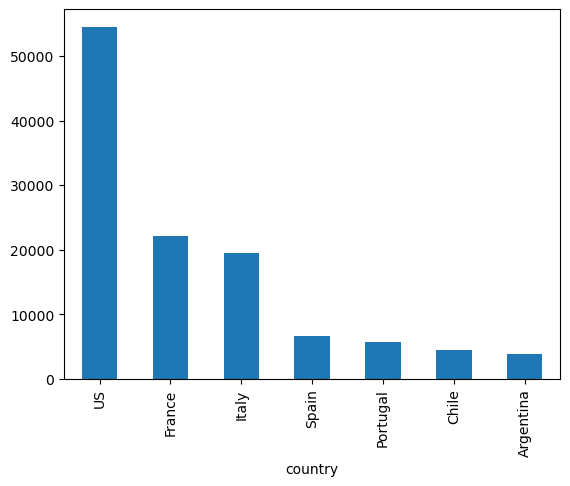

In [54]:
df['country'].value_counts().head(7).plot(kind='bar')
plt.show()

리뷰 데이터프레임의 price 컬럼 값에서, price의 평균값을 뺀 값을, centered_price 라고 저장하시오.

In [22]:
df['centered_price'] = df['price'] - df['price'].mean()
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,centered_price
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389


나는 경제적이므로, 가격대비 포인트가 가장 큰 와인을 사려한다. 해당 와인의 title은?

In [71]:
(df['points'] / df['price']).sort_values(ascending=False)

64590     21.50
126096    21.50
20484     21.25
1987      21.25
110255    21.00
          ...  
129844      NaN
129860      NaN
129863      NaN
129893      NaN
129964      NaN
Length: 129971, dtype: float64

In [80]:
df['가성비'] =  df['points'] / df['price']
df.sort_values('가성비',ascending=False).head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,centered_price,best,가성비
64590,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,-31.363389,21.5,21.5
126096,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Anna Lee C. Iijima,NaN,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,Cramele Recas,-31.363389,21.5,21.5


In [32]:
best1 = df.loc[df['best'].idxmax(), 'title']
best1

'Bandit NV Merlot (California)'

사람들이 어떤와인을 더 많이 거론했는지 보려한다.

"tropical" 이 들어있는 리뷰의 갯수를 세고, "fruity" 라고 들어있는 리뷰의 갯수를 세어서

판다스 시리즈로 descriptor_counts 변수로 만들어 보자.

In [89]:
df.head(2)
df['description'][0]
#대소문자 구분되니 모두 소문자로 바꾸기
df['description'].str.lower().str.contains('tropical').sum()

np.int64(3800)

In [90]:
df['description'].str.lower().str.contains('fruity').sum()

np.int64(9455)

별점 시스템을 만들려고 한다. 따라서 별점에 대한 데이터가 필요하다.

별점은 1,2,3 즉 3개로 만들것이다.

포인트가 95점 이상이면 3점, 85점 이상이면 2점, 나머지는 1점으로 할 것이다. 

리뷰데이터를 통해 각 데이터의 별점을 구하시오.

In [137]:
df.head(2)

def get_stars(points) : 
    if points >= 95 :
        return '***'
    elif points >= 85 :
        return '**'
    else: 
        return '*'
        
df['get_stars'] = df['points'].apply(get_stars)        

In [138]:
get_stars(87)

'**'

In [139]:
get_stars(97)

'***'

In [ ]:
get_stars(50)

In [140]:
print(df[['points', 'get_stars']].head())

   points get_stars
0      87        **
1      87        **
2      87        **
3      87        **
4      87        **


리뷰의 region_2 컬럼에 데이터가 비어있는 경우에는, 'Unknown'으로 셋팅하자.

In [114]:
df['region_2'] = df['region_2'].fillna('Unknown')
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,centered_price,best,가성비
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389,5.8,5.8


포인트별로 몇개의 데이터가 있는지 확인하세요

In [122]:
df['points'].value_counts().sort_index(ascending=False)

points
100       19
99        33
98        77
97       229
96       523
95      1535
94      3758
93      6489
92      9613
91     11359
90     15410
89     12226
88     17207
87     16933
86     12600
85      9530
84      6480
83      3025
82      1836
81       692
80       397
Name: count, dtype: int64

포인트별로 가격의 최솟값을 구하세요   
그러면 100점짜리 와인은 최소한 얼마를 주면 마실수있나요 ?

In [132]:
df.groupby('points')['price'].min().sort_index(ascending=False)

,count,mean,std,min,25%,50%,75%,max
points,,,,,,,,
100,19.0,485.947368,410.142451,80.0,230.0,359.0,583.5,1500.0
99,28.0,284.214286,210.734581,44.0,125.0,243.5,346.5,850.0
98,69.0,245.492754,278.559246,50.0,86.0,140.0,275.0,1900.0
97,207.0,207.173913,229.087465,35.0,82.0,120.0,233.5,2000.0
96,482.0,159.292531,226.955589,20.0,65.0,97.0,160.0,2500.0
95,1406.0,109.235420,102.278905,20.0,55.0,75.0,120.0,973.0
94,3449.0,81.436938,69.745545,13.0,48.0,63.0,90.0,1125.0
93,5935.0,63.112216,43.665968,12.0,39.0,52.0,75.0,770.0
92,8871.0,51.037763,32.295930,11.0,32.0,45.0,60.0,750.0


포인트별로 가격의 최대값 최소값 평균을 한번에 다 보고싶다

In [136]:
df.groupby('points')['price'].agg(['max','min','mean']).sort_index(ascending=False)

,max,min,mean
points,,,
100,1500.0,80.0,485.947368
99,850.0,44.0,284.214286
98,1900.0,50.0,245.492754
97,2000.0,35.0,207.173913
96,2500.0,20.0,159.292531
95,973.0,20.0,109.235420
94,1125.0,13.0,81.436938
93,770.0,12.0,63.112216
92,750.0,11.0,51.037763


In [141]:
## 포인트를 내림차순 정렬하되 포인트가 같으면 가격을 오름차순으로 정렬하세요
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,centered_price,best,가성비,get_stars
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN,**
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389,5.8,5.8,**


In [145]:
df.sort_values( ['points','price'],ascending=[False,True])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,centered_price,best,가성비,get_stars
113929,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,44.636611,1.250000,1.250000,***
123545,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,44.636611,1.250000,1.250000,***
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,Unknown,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton,114.636611,0.666667,0.666667,***
45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,164.636611,0.500000,0.500000,***
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,Unknown,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,174.636611,0.476190,0.476190,***
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122417,US,There's little going on in this wine beyond su...,DeLuz,80,45.0,California,California,California Other,NaN,NaN,Casa Tiene Vista NV DeLuz Red (California),Red Blend,Casa Tiene Vista,9.636611,1.777778,1.777778,*
28569,US,Smells and tastes like caramel and stewed cher...,Scoprire,80,55.0,California,California,California Other,NaN,NaN,Millésimé 2005 Scoprire Red (California),Red Blend,Millésimé,19.636611,1.454545,1.454545,*
103989,US,This suffers from major problems. It has all t...,Miljenko's Old Vines,80,69.0,California,Napa Valley,Napa,NaN,NaN,Grgich Hills 2004 Miljenko's Old Vines Zinfand...,Zinfandel,Grgich Hills,33.636611,1.159420,1.159420,*
117025,Portugal,A curious sauerkraut perfume leads to a hard e...,NaN,80,NaN,Lisboa,NaN,Unknown,Roger Voss,@vossroger,Quinta do Pinto 2008 Touriga Nacional (Lisboa),Touriga Nacional,Quinta do Pinto,NaN,NaN,NaN,*
